In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid19data = pd.read_csv("covid19-global-forecasting-week-2/data/train.csv")
#WHS stands for World Health System
WHS = pd.read_csv("covid19-global-forecasting-week-2/data/2.12_Health_systems.csv")

In [3]:
print(covid19data.Country_Region.unique())

print(covid19data[covid19data.Country_Region == "China"])

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Diamond Princess' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Holy See' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Korea, Sout

In [4]:
data = covid19data.query("Date>'2020-01-22'and Date<='2020-03-27'")
target_value = covid19data.query("Date >= '2020-03-28'")


timestamps = []
countries = []
provinces = []
confirmed_cases = []
fatalities = []

vector_df = pd.DataFrame(columns=["Country_Region", "Province_State", "Confirmed_Cases_X", "Fatalities_X"])

for country in data.Country_Region.unique():
    for province in data.query(f'Country_Region=="{country}"').Province_State.unique():
        countries.append(country)
        provinces.append(province)
        if str(province) == "nan":
            temp_df = data.query(f'Country_Region=="{country}"')
        else:
            temp_df = data.query(f'Country_Region=="{country}" and Province_State =="{province}"')
        confirmed_cases.append([float(x) for x in temp_df["ConfirmedCases"]])
        fatalities.append([float(x) for x in temp_df["Fatalities"]])
        
        
vector_df.Country_Region = countries
vector_df.Province_State = provinces
vector_df.Confirmed_Cases_X = confirmed_cases 
vector_df.Fatalities_X = fatalities; vector_df.head(5)

print(len(confirmed_cases))
print(target_value)

294
          Id                Province_State          Country_Region  \
66        67                           NaN             Afghanistan   
133      167                           NaN                 Albania   
200      267                           NaN                 Algeria   
267      367                           NaN                 Andorra   
334      467                           NaN                  Angola   
401      567                           NaN     Antigua and Barbuda   
468      667                           NaN               Argentina   
535      767                           NaN                 Armenia   
602      867  Australian Capital Territory               Australia   
669      967               New South Wales               Australia   
736     1067            Northern Territory               Australia   
803     1167                    Queensland               Australia   
870     1267               South Australia               Australia   
937     1367    

In [7]:
df = vector_df.merge(WHS, on=['Country_Region', 'Province_State'], how = "left") ; df.head(5)
df[['Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016', 'Physicians_per_1000_2009-18',
       'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_100000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16']] = df[['Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016', 'Physicians_per_1000_2009-18',
       'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_100000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16']].fillna(0, axis=1)

df.head(5)

,Country_Region,Province_State,Confirmed_Cases_X,Fatalities_X,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_100000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,0.0
1,Albania,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,0.0
3,Andorra,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Andorra,10.4,49.1,41.7,3834.7,4978.7,0.0,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,0.0,25.0,0.0


In [8]:
print(f'Data set contains info of:\t{len(df["Country_Region"].unique())} countries')

Data set contains info of:	173 countries


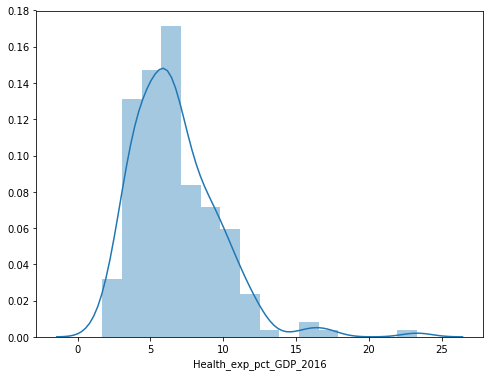

In [9]:
plt.figure(figsize=[8,6])
sns.distplot(WHS["Health_exp_pct_GDP_2016"])

In [10]:
print(df[df["Country_Region"] =="US"].Province_State)
print(df[df["Country_Region"] =="Italy"].Confirmed_Cases_X)


225                 Alabama
226                  Alaska
227                 Arizona
228                Arkansas
229              California
230                Colorado
231             Connecticut
232                Delaware
233    District of Columbia
234                 Florida
235                 Georgia
236                    Guam
237                  Hawaii
238                   Idaho
239                Illinois
240                 Indiana
241                    Iowa
242                  Kansas
243                Kentucky
244               Louisiana
245                   Maine
246                Maryland
247           Massachusetts
248                Michigan
249               Minnesota
250             Mississippi
251                Missouri
252                 Montana
253                Nebraska
254                  Nevada
255           New Hampshire
256              New Jersey
257              New Mexico
258                New York
259          North Carolina
260            North

In [11]:
print(df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Confirmed_Cases_X)

62    [444.0, 549.0, 761.0, 1058.0, 1423.0, 3554.0, ...
Name: Confirmed_Cases_X, dtype: object


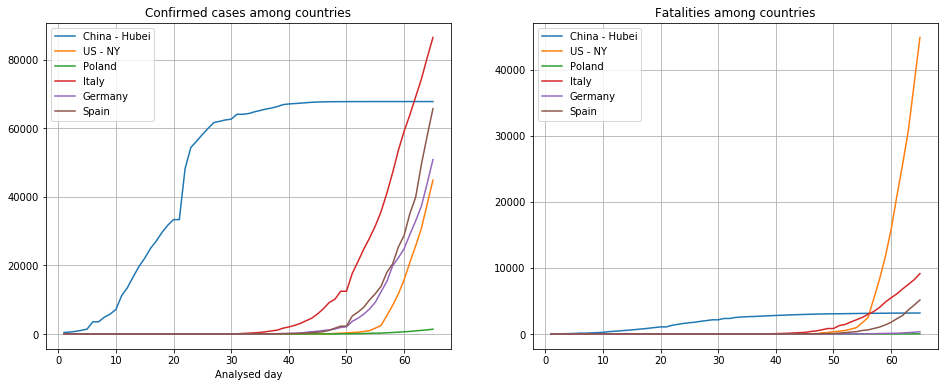

In [12]:
f, ax = plt.subplots(1, 2, figsize=[16, 6])
number_of_days = 66
countries_to_plot = ["Poland", "Italy", "Germany", "Spain"]

ax[0].plot(range(1, number_of_days), df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Confirmed_Cases_X.values[0], label = "China - Hubei")
ax[0].plot(range(1, number_of_days), df[(df.Country_Region == "US") & (df.Province_State == "New York")].Confirmed_Cases_X.values[0], label = "US - NY")
for country in countries_to_plot:
     ax[0].plot(range(1, number_of_days), df[df["Country_Region"] == country]["Confirmed_Cases_X"].values[0], label = country)
ax[0].set_title("Confirmed cases among countries")
ax[0].set_xlabel("Analysed day")
ax[0].legend()
ax[0].grid()

ax[1].plot(range(1, number_of_days), df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Fatalities_X.values[0], label = "China - Hubei")
ax[1].plot(range(1, number_of_days), df[(df.Country_Region == "US") & (df.Province_State == "New York")].Confirmed_Cases_X.values[0], label = "US - NY")
for country in countries_to_plot:
     ax[1].plot(range(1, number_of_days), df[df["Country_Region"] == country].Fatalities_X.values[0], label = country)
ax[1].set_title("Fatalities among countries")
ax[0].set_xlabel("Analysed day")
ax[1].legend()
ax[1].grid()

In [13]:
df = df.merge(target_value, on = ["Country_Region", "Province_State"]); df.head(5)

# target_value = pd.DataFrame(target_value)
# target_value.reset_index()
# print(target_value.shape)

,Country_Region,Province_State,Confirmed_Cases_X,Fatalities_X,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_100000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Id,Date,ConfirmedCases,Fatalities
0,Afghanistan,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,0.0,67,2020-03-28,110.0,4.0
1,Albania,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0,167,2020-03-28,197.0,10.0
2,Algeria,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,0.0,267,2020-03-28,454.0,29.0
3,Andorra,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Andorra,10.4,49.1,41.7,3834.7,4978.7,0.0,3.3,4.0,83.1,100.0,80.0,367,2020-03-28,308.0,3.0
4,Angola,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,0.0,25.0,0.0,467,2020-03-28,5.0,0.0


In [14]:
print(set(df.Country_Region.unique()) ^ set(target_value.Country_Region.unique()))
print(set(df.Province_State.unique()) ^ set(target_value.Province_State.unique()))

set()
set()


In [31]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout
from keras.activations import relu
from keras.losses import mean_squared_error, hinge
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(columns=["Country_Region","Confirmed_Cases_X", "Fatalities_X", "Province_State", "World_Bank_Name", "Id", "Date", "ConfirmedCases", "Fatalities"], axis=1)
y = df[["ConfirmedCases", "Fatalities"]]

In [32]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [33]:
X

array([[0.83606557, 0.053125  , 0.96029777, ..., 0.        , 0.423     ,
        0.        ],
       [0.54918033, 0.43125   , 0.71960298, ..., 0.0593047 , 0.984     ,
        0.53      ],
       [0.54098361, 0.70520833, 0.38337469, ..., 0.06186094, 1.        ,
        0.        ],
       ...,
       [0.46721311, 0.49375   , 0.55334988, ..., 0.        , 0.96      ,
        0.        ],
       [0.36885246, 0.39895833, 0.15012407, ..., 0.00766871, 0.113     ,
        0.        ],
       [0.7704918 , 0.484375  , 0.2630273 , ..., 0.00817996, 0.38      ,
        0.        ]])

In [37]:
def build_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=11))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='relu'))
    
    model.compile(optimizer="rmsprop", loss=mean_squared_error, metrics=['accuracy'])
    model.summary()
    
    return model

In [38]:
model = build_model()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                384       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 66        
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(X_train, y_train, epochs=100, batch_size=6)

Epoch 1/100
265/265 [==============================] - 0s 1ms/step - loss: 56841010.0247 - accuracy: 0.9434
Epoch 2/100
265/265 [==============================] - 0s 657us/step - loss: 56840028.9050 - accuracy: 0.9962
Epoch 3/100
265/265 [==============================] - 0s 627us/step - loss: 56839024.3829 - accuracy: 1.0000
Epoch 4/100
265/265 [==============================] - 0s 513us/step - loss: 56838330.5608 - accuracy: 0.9962
Epoch 5/100
265/265 [==============================] - 0s 422us/step - loss: 56837090.0466 - accuracy: 1.0000
Epoch 6/100
265/265 [==============================] - 0s 419us/step - loss: 56835797.3764 - accuracy: 1.0000
Epoch 7/100
265/265 [==============================] - 0s 374us/step - loss: 56833675.7071 - accuracy: 1.0000
Epoch 8/100
265/265 [==============================] - 0s 328us/step - loss: 56832620.0116 - accuracy: 1.0000
Epoch 9/100
265/265 [==============================] - 0s 458us/step - loss: 56830862.9802 - accuracy: 1.0000
Epoch 10/100

265/265 [==============================] - 0s 513us/step - loss: 56445894.3961 - accuracy: 1.0000
Epoch 75/100
265/265 [==============================] - 0s 390us/step - loss: 56432324.8826 - accuracy: 1.0000
Epoch 76/100
265/265 [==============================] - 0s 425us/step - loss: 56431704.9943 - accuracy: 1.0000
Epoch 77/100
265/265 [==============================] - 0s 383us/step - loss: 56430513.3526 - accuracy: 1.0000
Epoch 78/100
265/265 [==============================] - 0s 346us/step - loss: 56420105.3616 - accuracy: 1.0000
Epoch 79/100
265/265 [==============================] - 0s 246us/step - loss: 56434468.0783 - accuracy: 1.0000
Epoch 80/100
265/265 [==============================] - 0s 238us/step - loss: 56382634.6221 - accuracy: 1.0000
Epoch 81/100
265/265 [==============================] - 0s 259us/step - loss: 56393240.9630 - accuracy: 1.0000
Epoch 82/100
265/265 [==============================] - 0s 439us/step - loss: 56380812.0318 - accuracy: 1.0000
Epoch 83/100
2